In [36]:
import pickle

configs=[(True,True),(False, True),(True, False), (False, False)]
data=[]
for max_length,fill_0 in configs:
    data.append(pickle.load(open(f't5-large_obqa_fact_epoch_1_{max_length}_{fill_0}_loss.pkl','rb')))




In [39]:
import numpy as np
from pandas import DataFrame
col_name=[]
di={'# Step':np.arange(len(data[0]))}
for idx,(max_length,fill_0) in enumerate(configs):
    di[f'Flexible Max Length:{max_length}-Fill 0:{fill_0}']=data[idx]

df=DataFrame(di).melt(id_vars='# Step',var_name='Methodology').rename(columns={'value':'Loss value'}) #value_vars=['Flexible Max Length-Fill 0']
df

,# Step,Methodology,Loss value
0,0,Flexible Max Length:True-Fill 0:True,0.940158
1,1,Flexible Max Length:True-Fill 0:True,1.542071
2,2,Flexible Max Length:True-Fill 0:True,2.163385
3,3,Flexible Max Length:True-Fill 0:True,2.798869
4,4,Flexible Max Length:True-Fill 0:True,3.395107
...,...,...,...
3963,987,Flexible Max Length:False-Fill 0:False,0.159770
3964,988,Flexible Max Length:False-Fill 0:False,0.168855
3965,989,Flexible Max Length:False-Fill 0:False,0.169928
3966,990,Flexible Max Length:False-Fill 0:False,0.164729


In [43]:
accuracy=[[14,24,31,31,36,37],
    [44,55,62,60,62,66],
    [16,27,35,38,40,37],
    [39,49,50,51,58,63]]
steps=[150*(i+1) for i in range(len(accuracy[0]))]
di1={'# Step':steps}
for idx,(max_length,fill_0) in enumerate(configs):
    di1[f'Flexible Max Length:{max_length}-Fill 0:{fill_0}']=accuracy[idx]

df1=DataFrame(di1).melt(id_vars='# Step',var_name='Methodology').rename(columns={'value':'Accuracy'})
df1
               


,# Step,Methodology,Accuracy
0,150,Flexible Max Length:True-Fill 0:True,14
1,300,Flexible Max Length:True-Fill 0:True,24
2,450,Flexible Max Length:True-Fill 0:True,31
3,600,Flexible Max Length:True-Fill 0:True,31
4,750,Flexible Max Length:True-Fill 0:True,36
5,900,Flexible Max Length:True-Fill 0:True,37
6,150,Flexible Max Length:False-Fill 0:True,44
7,300,Flexible Max Length:False-Fill 0:True,55
8,450,Flexible Max Length:False-Fill 0:True,62
9,600,Flexible Max Length:False-Fill 0:True,60


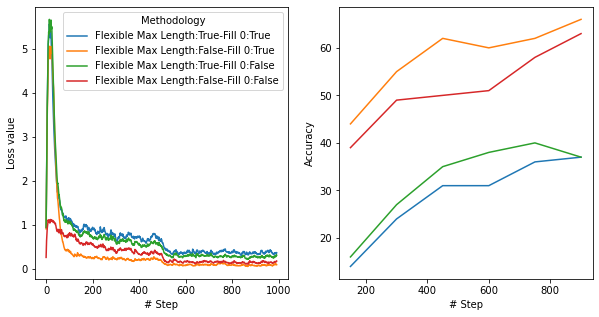

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(df, x='# Step',y='Loss value', hue='Methodology',ax=ax[0])
sns.lineplot(df1, x='# Step',y='Accuracy', hue='Methodology',ax=ax[1])
ax[1].legend().remove()